# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Описание данных

#### market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
id — номер покупателя в корпоративной базе данных.
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
Выручка — сумма выручки за период.

#### market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.

#### money.csv

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
id — номер покупателя в корпоративной базе данных.
Прибыль — значение прибыли.


# Инструкция по выполнению проекта

Решать задачу будем в два этапа:
Разработаем модель, которая предскажет вероятность снижения покупательской активности.

Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность. Используем данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). Можем проанализировать больше одного сегмента.  

Ниже несколько примеров сегментов:  

Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

## Шаг 1. Загрузка данных

1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:
/datasets/market_file.csv
/datasets/market_money.csv
/datasets/market_time.csv
/datasets/money.csv
Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  
1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных займемся позже.


In [1]:
!pip install shap
!pip install phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
#import shap
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv', sep=',')

market_money = pd.read_csv('/datasets/market_money.csv', sep=',')

market_time = pd.read_csv('/datasets/market_time.csv', sep=',')

money = pd.read_csv('/datasets/money.csv', sep=';')

In [4]:
print('Данные о о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:')
market_file.tail()

Данные о о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:


id Покупательская активность Тип сервиса Разрешить сообщать  \
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  
1295               3                11  
1296               3                 9  
1297               5                 7  
1298               5                 7  
1299               3                12

In [5]:
print(market_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
print('Данные о выручке, которую получает магазин с покупателя:')
market_money.head()

Данные о выручке, которую получает магазин с покупателя:


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [7]:
print(market_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [8]:
print('Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:')
market_time.tail()

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:


id            Период  минут
2595  216645     текущий_месяц     18
2596  216646  предыдцщий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдцщий_месяц     15

In [9]:
print(market_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


In [10]:
print('Данные о среднемесячной прибыли продавца за последние 3 месяца:')
money.head()

Данные о среднемесячной прибыли продавца за последние 3 месяца:


id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21

In [11]:
print(money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None


# Вывод

Мы изучили признаки и данные. Они соответствуют описанию задачи. Данный раздел позволяет нам первично понять какая обработка данных нам необходима в дальнейшем.

## Шаг 2. Предобработка данных

Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.


In [12]:
print(market_file.columns)
print('')
print(market_money.columns)
print('')
print(market_time.columns)
print('')
print(money.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Выручка'], dtype='object')

Index(['id', 'Период', 'минут'], dtype='object')

Index(['id', 'Прибыль'], dtype='object')


In [13]:
market_file.rename(columns={'Покупательская активность': 'Покупательская_активность', 'Тип сервиса': 'Тип_сервиса', 'Разрешить сообщать': 'Разрешить_сообщать'}, inplace=True)
print(market_file.columns)
print('')
market_time.rename(columns={'минут': 'Минут'}, inplace=True)
print(market_time.columns)

Index(['id', 'Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Минут'], dtype='object')


In [14]:
#перевести название к формату с заглавной
market_file['Тип_сервиса'] = market_file['Тип_сервиса'].str.title()
market_file['Разрешить_сообщать'] = market_file['Разрешить_сообщать'].str.title()
market_money['Период'] = market_money['Период'].str.title()
market_time['Период'] = market_time['Период'].str.title()

In [15]:
print('Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:')
market_time['Период'].tail()

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:


2595       Текущий_Месяц
2596    Предыдцщий_Месяц
2597       Текущий_Месяц
2598       Текущий_Месяц
2599    Предыдцщий_Месяц
Name: Период, dtype: object

In [16]:
print('Количество пропусков:')
print(' ')
print(market_file.isna().sum())
print(' ')
print(market_money.isna().sum())
print(' ')
print(market_time.isna().sum())
print(' ')
print(money.isna().sum())


Количество пропусков:
 
id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
 
id         0
Период     0
Выручка    0
dtype: int64
 
id        0
Период    0
Минут     0
dtype: int64
 
id         0
Прибыль    0
dtype: int64


In [17]:
print('Явные дубликаты:')
print(' ')
print(market_file.duplicated().sum())
print(' ')
print(market_money.duplicated().sum())
print(' ')
print(market_time.duplicated().sum())
print(' ')
print(money.duplicated().sum())

Явные дубликаты:
 
0
 
0
 
0
 
0


In [18]:
print('Типы данных:')
print(' ')
print(market_file.dtypes)
print(' ')
print(market_money.dtypes)
print(' ')
print(market_time.dtypes)
print(' ')
print(money.dtypes)

Типы данных:
 
id                                       int64
Покупательская_активность               object
Тип_сервиса                             object
Разрешить_сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object
 
id           int64
Период      object
Выручка    float64
dtype: object
 
id         int64
Период    object
Минут      int64
dtype: object
 
id          int64
Прибыль    object
dtype: object


In [19]:
money.tail()

id Прибыль
1295  216643    4,44
1296  216644    6,11
1297  216645    3,29
1298  216646    4,03
1299  216647    3,28

In [20]:
def func1(data, columns):
    for column in columns:
        # Заменяем запятые на точки в столбце
        data[column] = data[column].str.replace(',', '.')
        # Преобразуем в float
        data[column] = data[column].astype(float)

In [21]:
# Преобразование столбцов 
func1(money,['Прибыль'])
print(money.tail())
print(money.dtypes)

          id  Прибыль
1295  216643     4.44
1296  216644     6.11
1297  216645     3.29
1298  216646     4.03
1299  216647     3.28
id           int64
Прибыль    float64
dtype: object


In [22]:
def func2(df, columns):
    for column in columns:
        print(df[column].unique())

In [23]:
# Проверка уникальных значений для каждого DataFrame
func2(market_file, ['Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит'])
print(' ')
func2(market_money, ['Период', 'Выручка'])
print(' ')
func2(market_time, ['Период', 'Минут'])
print(' ')
func2(money, ['Прибыль'])

['Снизилась' 'Прежний уровень']
['Премиум' 'Стандартт' 'Стандарт']
['Да' 'Нет']
[3.4 4.4 4.9 3.2 5.1 3.3 4.7 4.2 3.9 4.6 4.3 3.8 2.7 4.8 2.9 3.  2.4 1.7
 3.6 4.  1.5 3.5 4.1 3.1 1.4 0.9 5.6 2.6 5.5 5.2 5.8 5.  5.4 5.7 5.3 3.7
 6.3 6.6 4.5 6.1 5.9]
[5 4 3]
[ 121  819  539  896 1064  762  431  284  192  154  450  110  623  199
  438  923  708  167  209  581  829  607  572  365  566  811  268  558
  534  730  488  436  637  554  330  504 1020  721  495  135  663 1047
  152  754  525  169  966  645  706  689  882 1007  304  339  954  771
  699  669  511  974  666  857 1048  756  506  759  768  720  219  377
  472  806  449  523  503  515  813  249  186  336  690  824  753  674
  875  844  602  855  448  344  922  298  893  881  372  788  937  764
  851 1021  627  748  684  719  891  842  573 1057  342  638  458  254
  600  871  574  982  324  373  839  845  475  509  252  820  744  541
 1079  900  474  957  773  717  508  184  828  944  419  302  898  705
  953  355  616  622  335 1025  75

In [24]:
# замена значений
market_file['Тип_сервиса'] = market_file['Тип_сервиса'].str.replace('Стандартт', 'Стандарт')
# market_money['Период'] = market_money['Период'].str.replace('Препредыдущий_Месяц', 'Предыдущий_Месяц')
market_time['Период'] = market_time['Период'].str.replace('Предыдцщий_Месяц', 'Предыдущий_Месяц')

In [25]:
# Проверка уникальных значений для каждого DataFrame
func2(market_file, ['Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит'])
print(' ')
func2(market_money, ['Период', 'Выручка'])
print(' ')
func2(market_time, ['Период', 'Минут'])
print(' ')
func2(money, ['Прибыль'])

['Снизилась' 'Прежний уровень']
['Премиум' 'Стандарт']
['Да' 'Нет']
[3.4 4.4 4.9 3.2 5.1 3.3 4.7 4.2 3.9 4.6 4.3 3.8 2.7 4.8 2.9 3.  2.4 1.7
 3.6 4.  1.5 3.5 4.1 3.1 1.4 0.9 5.6 2.6 5.5 5.2 5.8 5.  5.4 5.7 5.3 3.7
 6.3 6.6 4.5 6.1 5.9]
[5 4 3]
[ 121  819  539  896 1064  762  431  284  192  154  450  110  623  199
  438  923  708  167  209  581  829  607  572  365  566  811  268  558
  534  730  488  436  637  554  330  504 1020  721  495  135  663 1047
  152  754  525  169  966  645  706  689  882 1007  304  339  954  771
  699  669  511  974  666  857 1048  756  506  759  768  720  219  377
  472  806  449  523  503  515  813  249  186  336  690  824  753  674
  875  844  602  855  448  344  922  298  893  881  372  788  937  764
  851 1021  627  748  684  719  891  842  573 1057  342  638  458  254
  600  871  574  982  324  373  839  845  475  509  252  820  744  541
 1079  900  474  957  773  717  508  184  828  944  419  302  898  705
  953  355  616  622  335 1025  755  549  308 

# Вывод

Мы проверили пропуски в данных, извлекли явные дубликаты, добавили новые необходимые столбцы, а также привели данные к нужным типам.

Изменение типов данных необходимо для корректного анализа и обработки данных. 

   - Переход на `Int64` (поддерживает пропуски) вместо `float64` позволяет корректно работать с целыми числами и пропущенными значениями.
 
   - Замена `object` на `int64` упрощает подсчеты и анализ. Например, можно легко посчитать среднее.

Изменение типов данных позволяет улучшить производительность, снизить вероятность ошибок и расширить возможности анализа.

Избавление от явных и неявных дубликатов важно для:  

1. **Точности анализа** — дубликаты искажают результаты, увеличивая вес одинаковых данных.  
2. **Повышения производительности** — меньший объем данных ускоряет расчеты.  
3. **Улучшения качества данных** — дубликаты часто указывают на ошибки сбора информации.  
4. **Экономии ресурсов** — сокращается использование памяти и дискового пространства. 
5. **Корректного представления** — исключение повторов делает данные репрезентативными.  
6. **Устранения ошибок** — неявные дубликаты, например, с разным форматом записи, скрывают истинное распределение.  

Удаление дубликатов повышает достоверность анализа и упрощает обработку.

## Шаг 3. Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.


In [26]:
print('Описательная статистика:')
market_file.describe()

Описательная статистика:


id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

In [27]:
print('Описательная статистика:')
market_money.describe()

Описательная статистика:


id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

In [28]:
print('Описательная статистика:')
market_time.describe()

Описательная статистика:


id        Минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

In [29]:
print('Описательная статистика:')
money.describe()

Описательная статистика:


id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

Данные о о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:


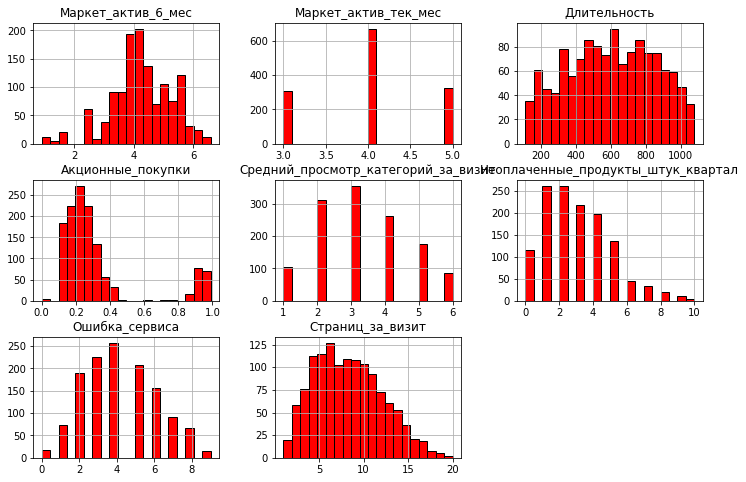

In [30]:
# Строим гистограммы
print('Данные о о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:')
data_1 = market_file.drop(['id'], axis=1).hist(figsize=(12, 8), bins=20, color = 'red', edgecolor = 'black')
plt.show()

Данные о выручке, которую получает магазин с покупателя:


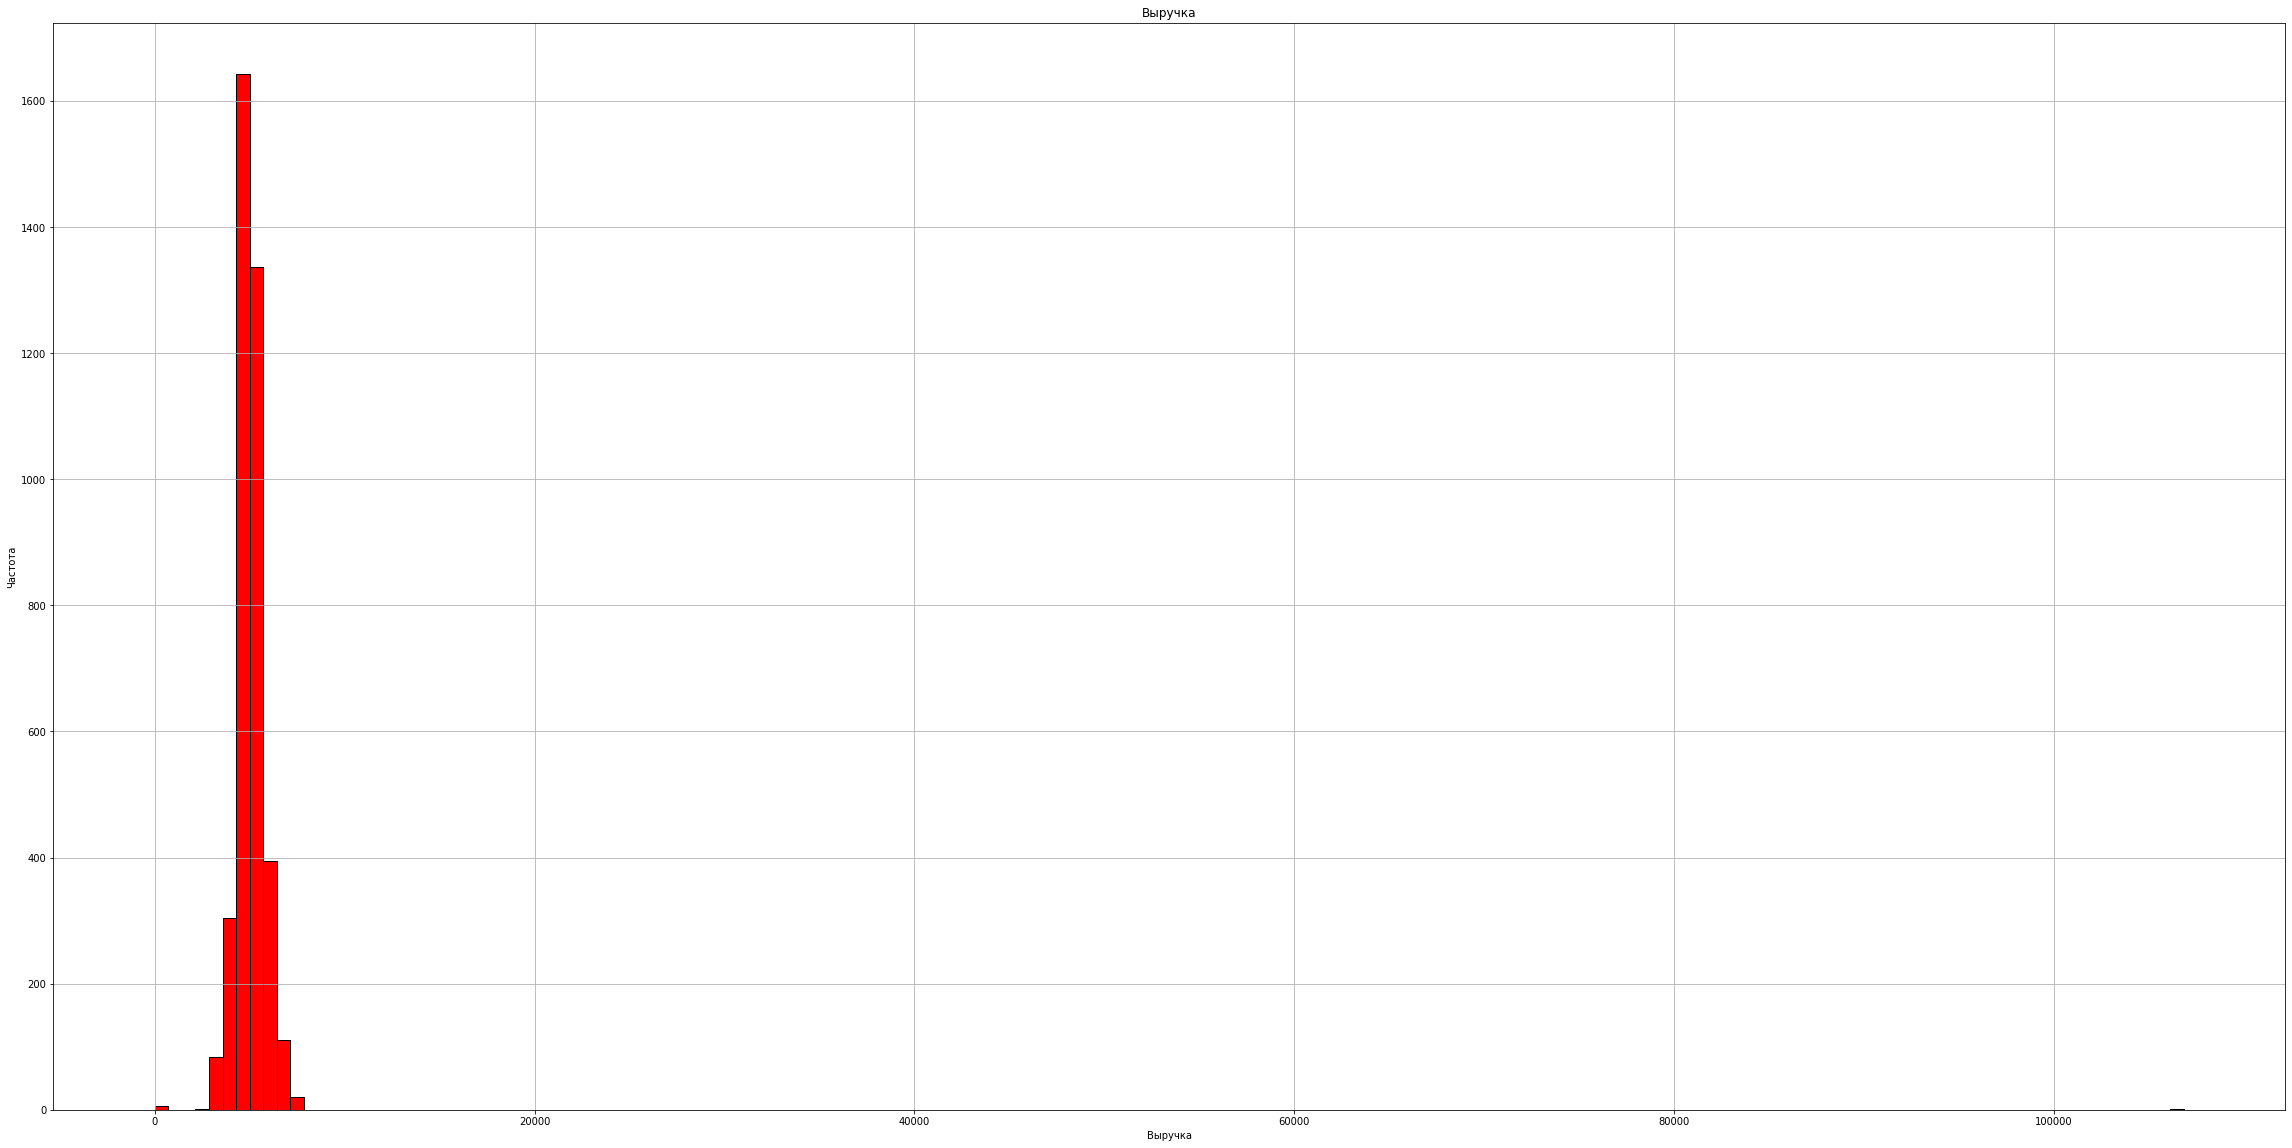

In [31]:
# Строим гистограммы

print('Данные о выручке, которую получает магазин с покупателя:')
data_2 = market_money.drop(['id'], axis=1).hist(figsize=(40, 20), bins=150, color='red', edgecolor='black')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:


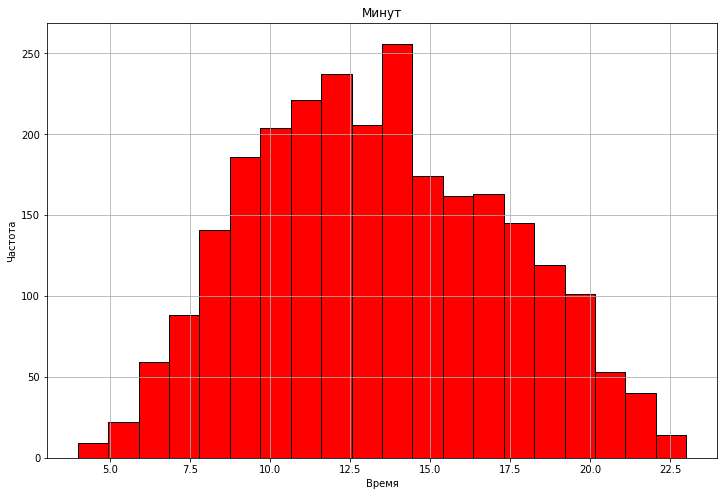

In [32]:
# Строим гистограммы
print('Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:')
data_3 = market_time.drop(['id'], axis=1).hist(figsize=(12, 8), bins=20, color = 'red', edgecolor = 'black')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.show()

Данные о среднемесячной прибыли продавца за последние 3 месяца:


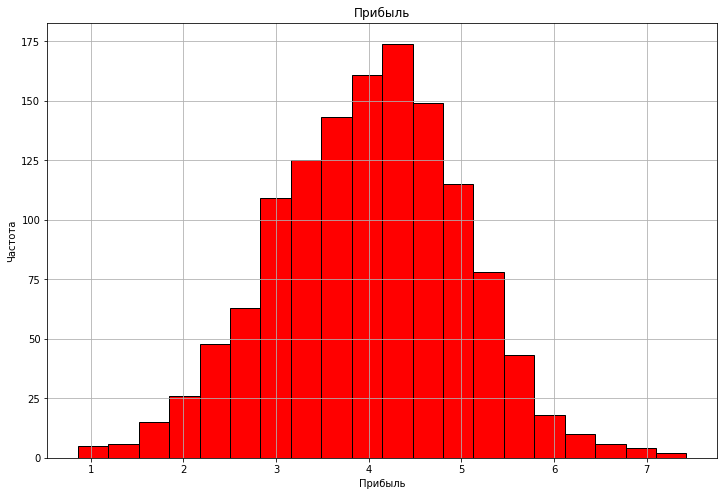

In [33]:
# Строим гистограммы
print('Данные о среднемесячной прибыли продавца за последние 3 месяца:')
data_4 = money.drop(['id'], axis=1).hist(figsize=(12, 8), bins=20, color = 'red', edgecolor = 'black')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.show()

Данные о market_file:


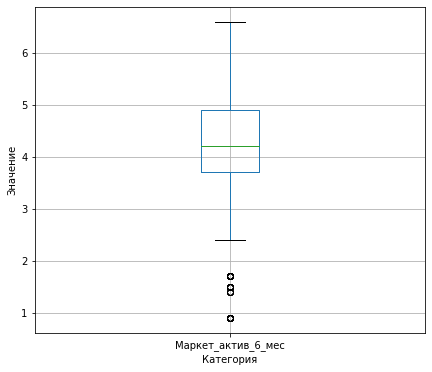

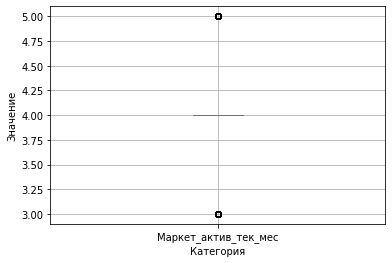

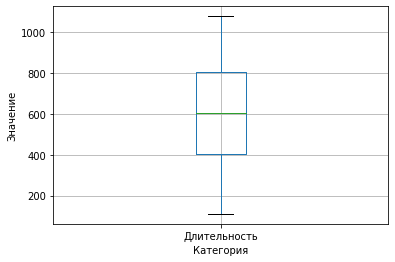

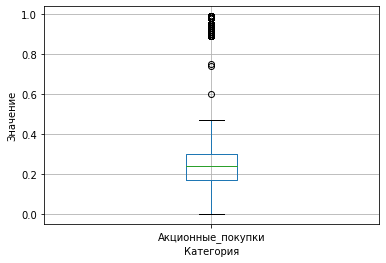

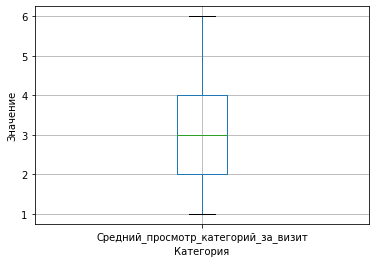

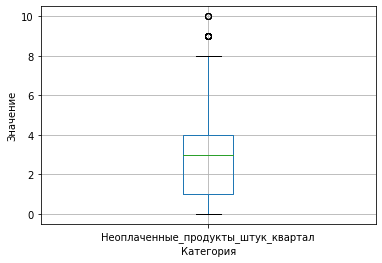

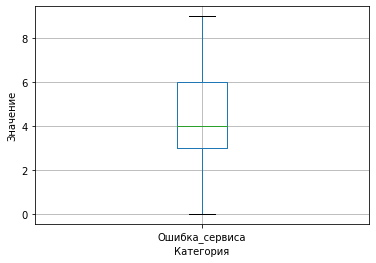

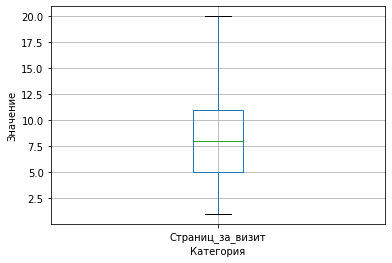

In [34]:
# Строим ящик с усами
print('Данные о market_file:')

plt.figure(figsize=(7, 6))
market_file.boxplot(column=['Маркет_актив_6_мес'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Маркет_актив_тек_мес'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Длительность'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Акционные_покупки'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Средний_просмотр_категорий_за_визит'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Неоплаченные_продукты_штук_квартал'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Ошибка_сервиса'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()
market_file.boxplot(column=['Страниц_за_визит'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()


Данные о market_money:


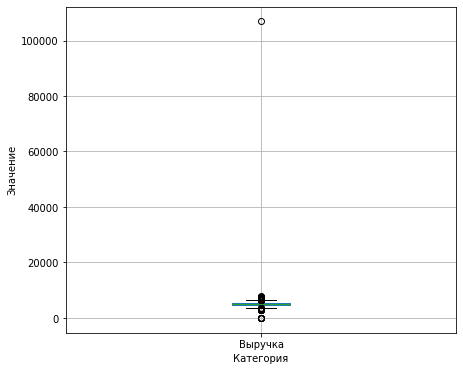

In [35]:
# Строим ящик с усами
print('Данные о market_money:')

plt.figure(figsize=(7, 6))
market_money.boxplot(column=['Выручка'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()


Данные о market_time:


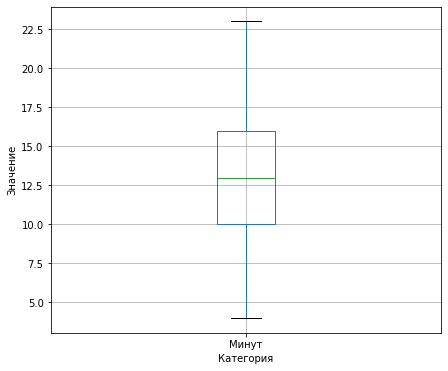

In [36]:
# Строим ящик с усами
print('Данные о market_time:')

plt.figure(figsize=(7, 6))
market_time.boxplot(column=['Минут'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()


Данные о money:


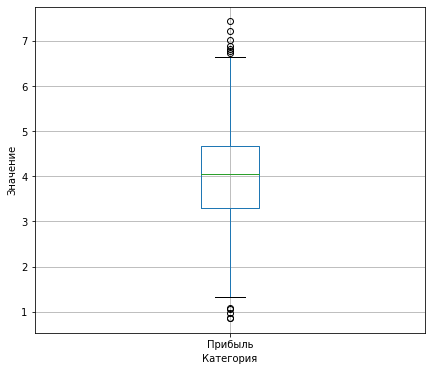

In [37]:
# Строим ящик с усами
print('Данные о money:')

plt.figure(figsize=(7, 6))
money.boxplot(column=['Прибыль'])
plt.suptitle('')  # Убираем автоматически добавляемое заглавие
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.show()


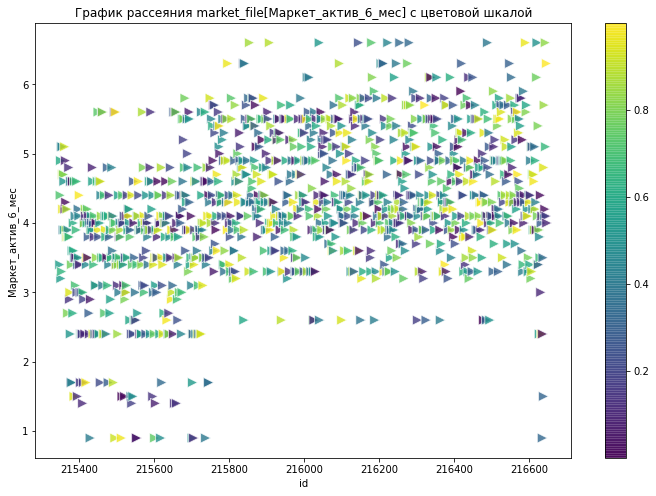

In [38]:
# сайт который использовался чтобы поэкспериментировать https://habr.com/ru/articles/855758/
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Маркет_актив_6_мес']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Маркет_актив_6_мес', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Маркет_актив_6_мес] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (так как наблюдаются линии).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

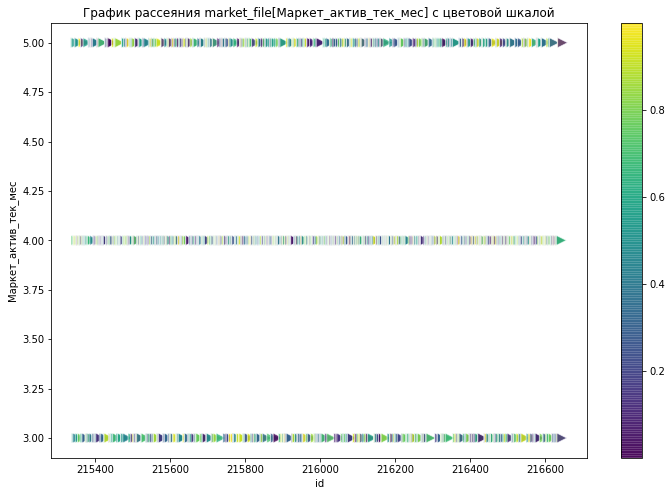

In [39]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Маркет_актив_тек_мес']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Маркет_актив_тек_мес', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Маркет_актив_тек_мес] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 4, 5, 3).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

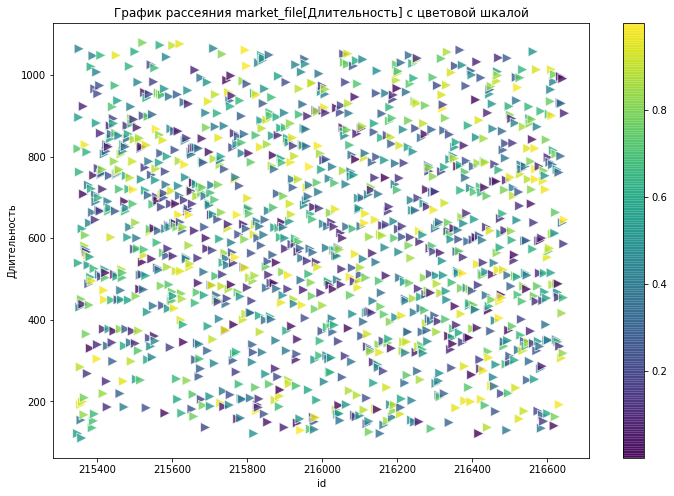

In [40]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Длительность']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Длительность', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Длительность] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, чуть больше значений наблюдается в промежутке от 400 до 800, в промежутке до 100 и от 1100 значений практически нет. 
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

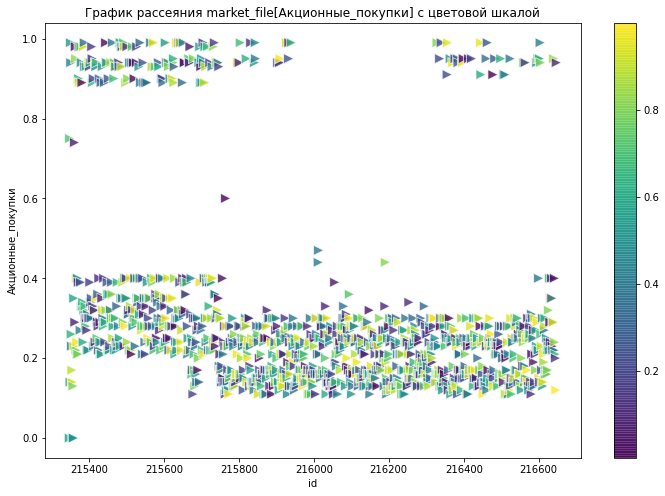

In [41]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Акционные_покупки']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Акционные_покупки', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Акционные_покупки] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, в основномзначения лежат в промежутке от 0.1 до 0.4, в промежутке до 0.1 и от 0.4 до 0.9 значений практически нет. 
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

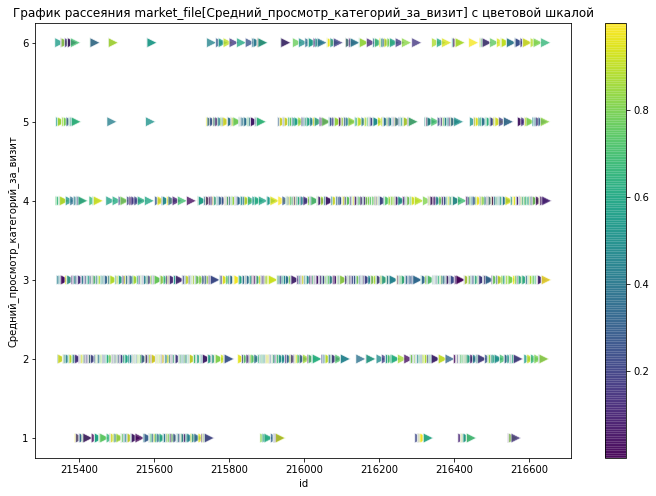

In [42]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Средний_просмотр_категорий_за_визит']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Средний_просмотр_категорий_за_визит', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Средний_просмотр_категорий_за_визит] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 1, 2, 3).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

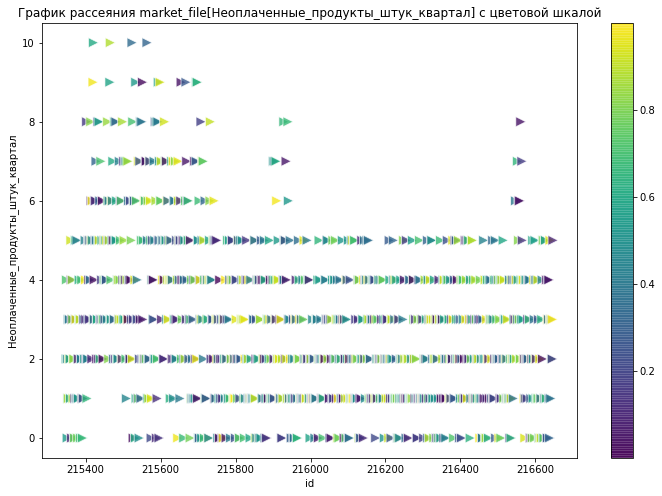

In [43]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Неоплаченные_продукты_штук_квартал']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Неоплаченные_продукты_штук_квартал', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Неоплаченные_продукты_штук_квартал] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 0, 1, 2).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

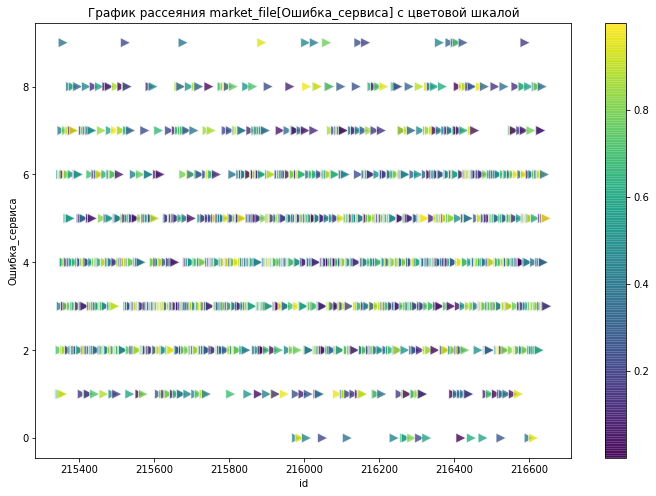

In [44]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Ошибка_сервиса']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Ошибка_сервиса', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Ошибка_сервиса] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 0, 1, 2).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

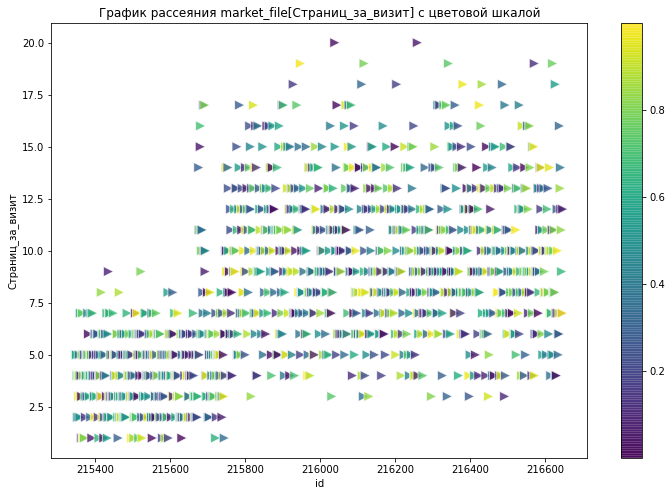

In [45]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_file['Страниц_за_визит']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_file, 
                          x='id', y='Страниц_за_визит', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_file[Страниц_за_визит] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 5, 3, 10).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

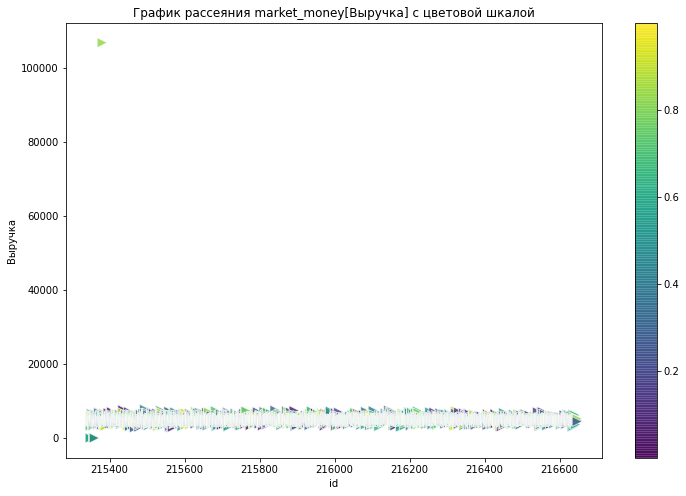

In [46]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_money['Выручка']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_money, 
                          x='id', y='Выручка', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_money[Выручка] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенному значению.
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

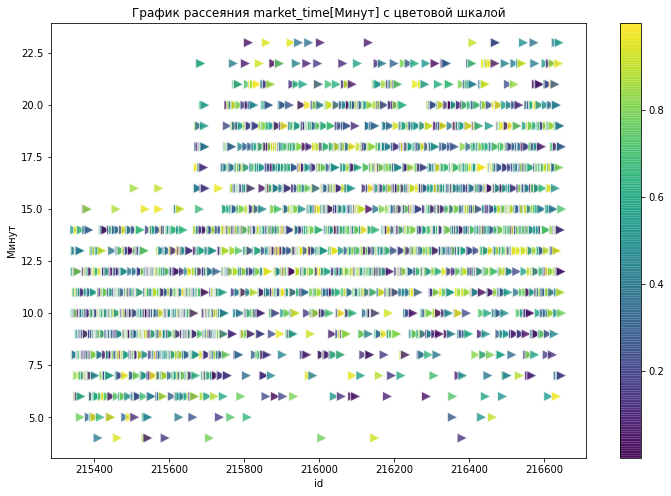

In [47]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(market_time['Минут']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=market_time, 
                          x='id', y='Минут', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния market_time[Минут] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует, видно что признаки сконцетрированы/принадлежат определенным целым (не промежуточным) значениям (например 5, 20, 10).  
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

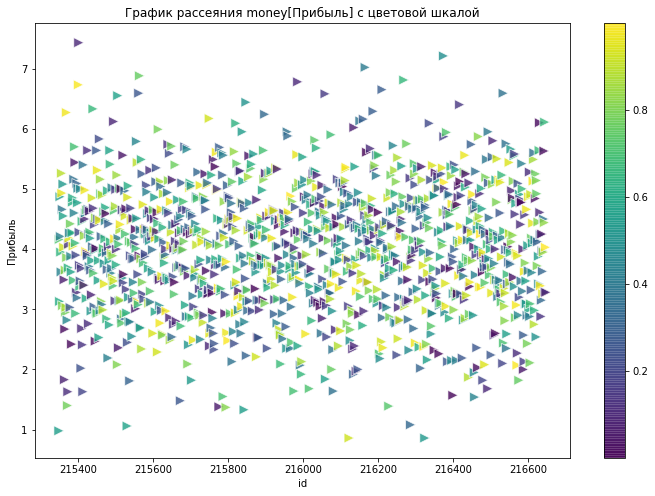

In [48]:
# Установка размера графика
plt.figure(figsize=(12, 8))  

rng = np.random.RandomState(0)

# Генерация массива цветов 
colors = rng.rand(len(money['Прибыль']))

# Построение графика рассеяния 
scatter = sns.scatterplot(data=money, 
                          x='id', y='Прибыль', 
                          c=colors, alpha=0.8, cmap='viridis', s=100, marker='>')

# Создание цветовой шкалы, используя результат графика
plt.colorbar(scatter.collections[0])
plt.title('График рассеяния money[Прибыль] с цветовой шкалой')
plt.show()

График говорит о том, что корреляция отстутствует. В основном значения наблюдаются в промежутке от 2.5 до 5.5. 
Цвета на графике будут разными в зависимости от случайно сгенерированных значений.

In [49]:
# Фильтрация клиентов с покупательской активностью не менее трех месяцев
# Предполагаем, что "покупательская активность" отображает активность в последние 6 месяцев
active_clients = money[money['Прибыль'] > 0]

# Количество отобранных клиентов
number_of_active_clients = active_clients['id'].nunique()

print(f'Количество клиентов с покупательской активностью не менее 3 месяцев: {number_of_active_clients}')

# Дополнительный анализ по всем клиентам
print(active_clients.describe())

Количество клиентов с покупательской активностью не менее 3 месяцев: 1300
                  id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000


# Выводы

   В результате анализа было выявлено **1300 клиентов**, которые проявляли покупательскую активность на протяжении **не менее трёх месяцев**. Это означает, что данные клиенты совершали покупки в течение трёх или более месяцев, что свидетельствует об их вовлечённости и лояльности.

   - Средняя прибыль на одного клиента составляет **3.996631** (условные единицы).  
   - Минимальная прибыль от клиента — **0.860**, а максимальная — **7.430**.  
   - Медианное значение прибыли (**4.045**) близко к среднему, что указывает на относительно симметричное распределение данных.  
   - Стандартное отклонение (**1.013722**) показывает, что значения прибыли варьируются умеренно вокруг среднего.  

   - 25% клиентов приносят прибыль менее **3.300**, а 75% клиентов — менее **4.670**.  
   - Половина клиентов (медиана) приносит прибыль в диапазоне от **3.300** до **4.670**.  

   Данные клиенты представляют собой ценную аудиторию, так как их активность и прибыльность подтверждены за трёхмесячный период. Это позволяет рассматривать их как целевую группу для дальнейших маркетинговых стратегий, направленных на увеличение их среднего чека и удержания.

## Шаг 4. Объединение таблиц

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.


In [50]:
from functools import reduce

In [51]:
print('Типы данных:')
print(' ')
print(market_file.dtypes)
print(' ')
print(market_money.dtypes)
print(' ')
print(market_time.dtypes)
print(' ')
print(money.dtypes)

Типы данных:
 
id                                       int64
Покупательская_активность               object
Тип_сервиса                             object
Разрешить_сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object
 
id           int64
Период      object
Выручка    float64
dtype: object
 
id         int64
Период    object
Минут      int64
dtype: object
 
id           int64
Прибыль    float64
dtype: object


In [52]:
# Удаляем записи с нулевой выручкой
market_money = market_money[market_money['Выручка'] > 0]

# Фильтрация выбросов по методу межквартильного размаха (IQR)
Q1 = market_money['Выручка'].quantile(0.25)
Q3 = market_money['Выручка'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

market_money = market_money[(market_money['Выручка'] > lower_bound) & (market_money['Выручка'] < upper_bound)]

# Пивотируем таблицы
market_money = market_money.pivot(index='id', columns='Период', values='Выручка').reset_index().rename(
    columns=lambda x: f"{x}_Выручка" if x != 'id' else x
)
market_time = market_time.pivot(index='id', columns='Период', values='Минут').reset_index().rename(
    columns=lambda x: f"{x}_Минут" if x != 'id' else x
)

# Удаляем строки с пропусками
market_money.dropna(inplace=True)
market_time.dropna(inplace=True)

# Объединяем таблицы
market = market_file.merge(market_money, on='id', how='inner').merge(market_time, on='id', how='inner')

print(f"Количество пользователей после обработки выбросов: {market.shape[0]}")
# Проверяем итоговые названия столбцов
print("Финальные столбцы:", market.columns)

Количество пользователей после обработки выбросов: 1144
Финальные столбцы: Index(['id', 'Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Предыдущий_Месяц_Выручка',
       'Препредыдущий_Месяц_Выручка', 'Текущий_Месяц_Выручка',
       'Предыдущий_Месяц_Минут', 'Текущий_Месяц_Минут'],
      dtype='object')


In [53]:
market

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0     215349                 Снизилась     Премиум                 Да   
1     215350                 Снизилась    Стандарт                Нет   
2     215352                 Снизилась    Стандарт                Нет   
3     215353                 Снизилась    Стандарт                 Да   
4     215354                 Снизилась    Стандарт                 Да   
...      ...                       ...         ...                ...   
1139  216643           Прежний уровень    Стандарт                 Да   
1140  216644           Прежний уровень    Стандарт                Нет   
1141  216645           Прежний уровень    Стандарт                 Да   
1142  216646           Прежний уровень    Стандарт                 Да   
1143  216647           Прежний уровень     Премиум                 Да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    4.4                     4           819   
1                    4.9                     3           539   
2                    5.1                     3          1064   
3                    3.3                     4           762   
4                    5.1                     3           431   
...                  ...                   ...           ...   
1139                 6.6                     3           318   
1140                 5.1                     4           454   
1141                 4.1                     3           586   
1142                 6.3                     5           645   
1143                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.75                Товары для детей   
1                  0.14               Домашний текстиль   
2                  0.94                Товары для детей   
3                  0.26               Домашний текстиль   
4                  0.23           Косметика и аксесуары   
...                 ...                             ...   
1139               0.24  Техника для красоты и здоровья   
1140               0.21               Домашний текстиль   
1141               0.20               Домашний текстиль   
1142               0.12  Техника для красоты и здоровья   
1143               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       4                                   4   
1                                       5                                   2   
2                                       3                                   2   
3                                       4                                   1   
4                                       2                                   3   
...                                   ...                                 ...   
1139                                    5                                   3   
1140                                    6                                   2   
1141                                    3                                   2   
1142                                    3                                   3   
1143                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  Предыдущий_Месяц_Выручка  \
0                  2                 5                    5216.0   
1                  1                 5                    5457.5   
2                  3                 2                    5807.5   
3                  1                 4                    4738.5   
4                  7                 2                    5685.0   
...              ...               ...                       ...   
1139               3                11                    3664.0   
1140               3                 9                    4729.0   
1141               5                 7                    5160.0   
11

## Шаг 5. Корреляционный анализ

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.


In [54]:
# print('Коэффициенты корреляции:')
# market.corr()

In [55]:
from phik import resources, phik_matrix

In [56]:
# Определяем непрерывные (интервальные) признаки вручную
interval_cols = ['Акционные_покупки', 'Маркет_актив_6_мес', 'Длительность',
                 'Предыдущий_Месяц_Выручка', 'Препредыдущий_Месяц_Выручка','Текущий_Месяц_Выручка']

In [57]:
# Вычисляем матрицу корреляций phik
phik_corr = market.drop(columns = 'id').phik_matrix(interval_cols=interval_cols)

print("Коэффициенты корреляции (phik):")
phik_corr

Коэффициенты корреляции (phik):


Покупательская_активность  Тип_сервиса  \
Покупательская_активность                             1.000000     0.143311   
Тип_сервиса                                           0.143311     1.000000   
Разрешить_сообщать                                    0.000000     0.303186   
Маркет_актив_6_мес                                    0.541383     0.110174   
Маркет_актив_тек_мес                                  0.000000     0.052849   
Длительность                                          0.045086     0.391486   
Акционные_покупки                                     0.515899     0.045300   
Популярная_категория                                  0.287863     0.000000   
Средний_просмотр_категорий_за_визит                   0.556798     0.190153   
Неоплаченные_продукты_штук_квартал                    0.407490     0.124520   
Ошибка_сервиса                                        0.244637     0.110118   
Страниц_за_визит                                      0.736820     0.037585   
Предыдущий_Месяц_Выручка                              0.208591     0.000000   
Препредыдущий_Месяц_Выручка                           0.506346     0.078710   
Текущий_Месяц_Выручка                                 0.223827     0.077077   
Предыдущий_Месяц_Минут                                0.606400     0.131428   
Текущий_Месяц_Минут                                   0.561310     0.000000   

                                     Разрешить_сообщать  Маркет_актив_6_мес  \
Покупательская_активность                      0.000000            0.541383   
Тип_сервиса                                    0.303186            0.110174   
Разрешить_сообщать                             1.000000            0.000000   
Маркет_актив_6_мес                             0.000000            1.000000   
Маркет_актив_тек_мес                           0.045964            0.089602   
Длительность                                   0.253805            0.000000   
Акционные_покупки                              0.026534            0.281280   
Популярная_категория                           0.064051            0.134257   
Средний_просмотр_категорий_за_визит            0.075622            0.193263   
Неоплаченные_продукты_штук_квартал             0.160083            0.217016   
Ошибка_сервиса                                 0.030509            0.127521   
Страниц_за_визит                               0.112124            0.367052   
Предыдущий_Месяц_Выручка                       0.089929            0.111796   
Препредыдущий_Месяц_Выручка                    0.000000            0.313591   
Текущий_Месяц_Выручка                          0.080355            0.103833   
Предыдущий_Месяц_Минут                         0.054413            0.337934   
Текущий_Месяц_Минут                            0.000000            0.318189   

                                     Маркет_актив_тек_мес  Длительность  \
Покупательская_активность                        0.000000      0.045086   
Тип_сервиса                                      0.052849      0.391486   
Разрешить_сообщать                               0.045964      0.253805   
Маркет_актив_6_мес                               0.089602      0.000000   
Маркет_актив_тек_мес                             1.000000      0.189095   
Длительность                                     0.189095      1.000000   
Акционные_покупки                                0.000000      0.000000   
Популярная_категория                             0.126511      0.000000   
Средний_просмотр_категорий_за_визит              0.245978      0.176090   
Неоплаченные_продукты_штук_квартал               0.133496      0.142706   
Ошибка_сервиса                                   0.126888      0.201432   
Страниц_за_визит                                 0.000000      0.095804   
Предыдущий_Месяц_Выручка                         0.000000      0.000000   
Препредыдущий_Месяц_Выручка                      0.075093      0.085377   
Текущий_Месяц_Выручка                            0.027709      0.0

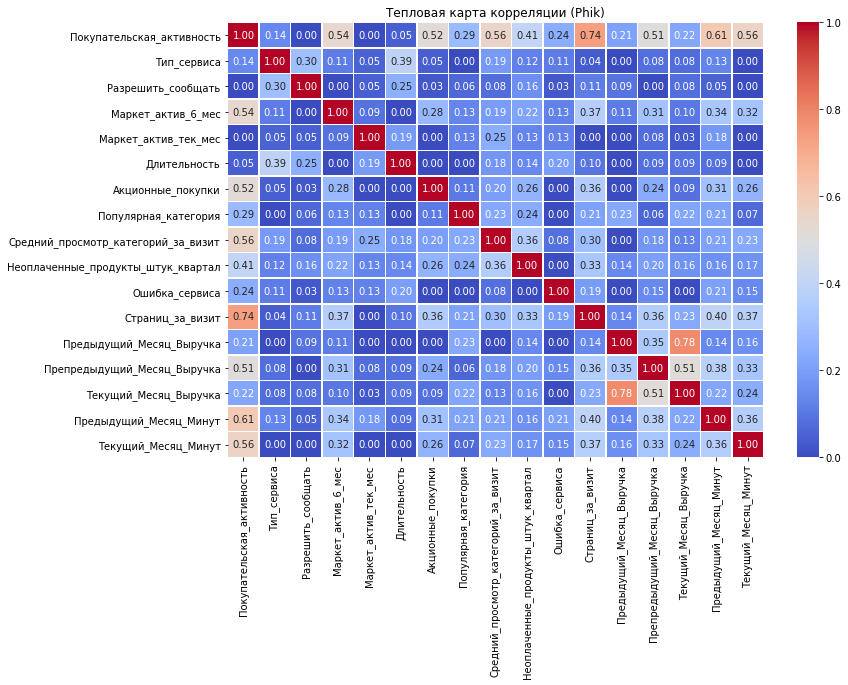

In [58]:
# Настраиваем размер фигуры
plt.figure(figsize=(12, 8))

# Создаём тепловую карту
sns.heatmap(phik_corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Заголовок графика
plt.title("Тепловая карта корреляции (Phik)")
plt.show()


In [59]:
correlation = market[interval_cols].corr()
print(correlation['Акционные_покупки'].sort_values(ascending=False))

Акционные_покупки              1.000000
Текущий_Месяц_Выручка          0.033364
Длительность                   0.020669
Предыдущий_Месяц_Выручка      -0.000427
Препредыдущий_Месяц_Выручка   -0.211213
Маркет_актив_6_мес            -0.230522
Name: Акционные_покупки, dtype: float64


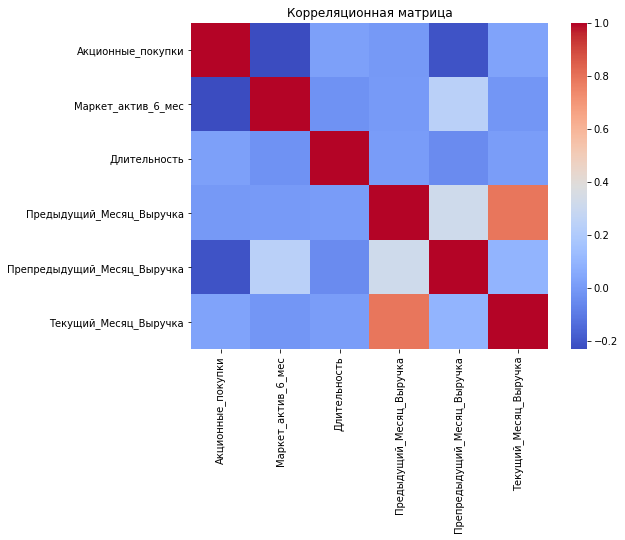

In [60]:
# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

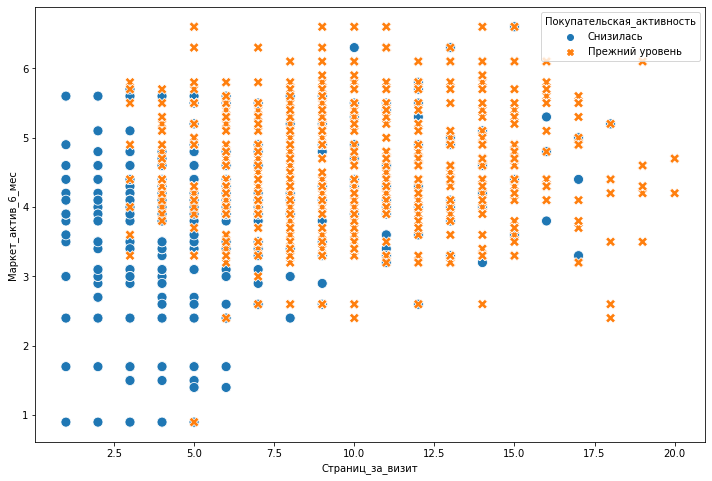

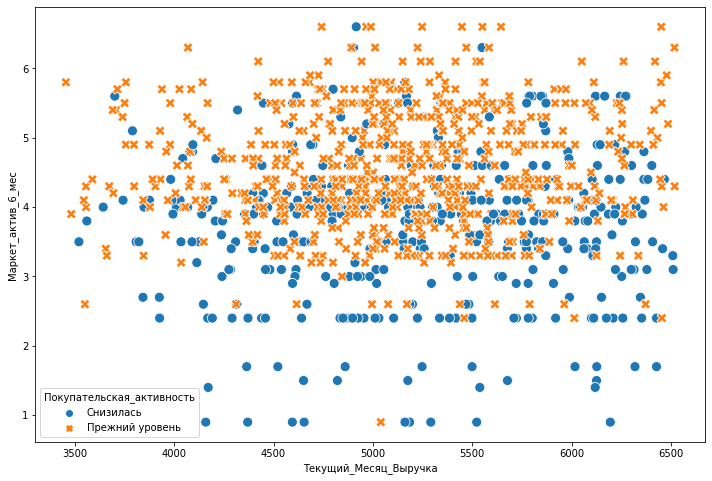

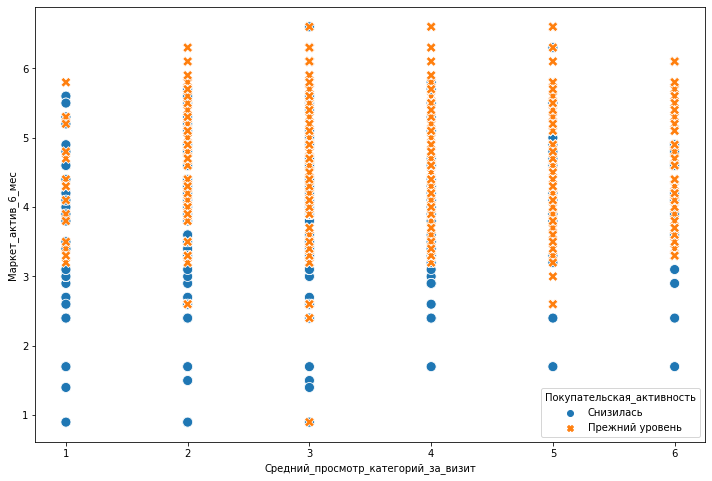

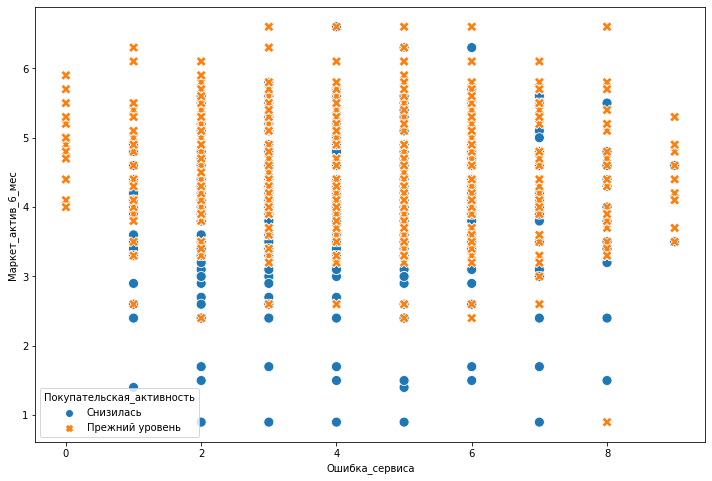

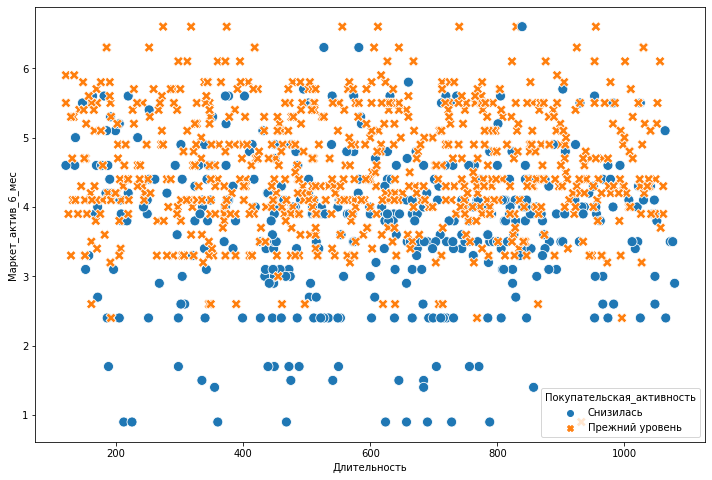

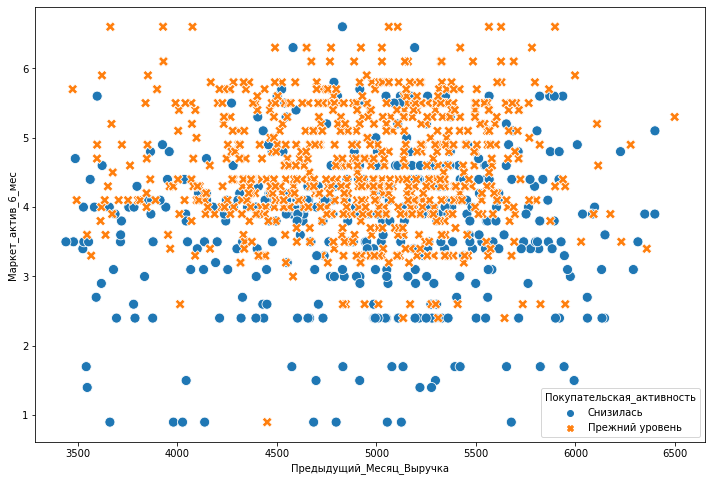

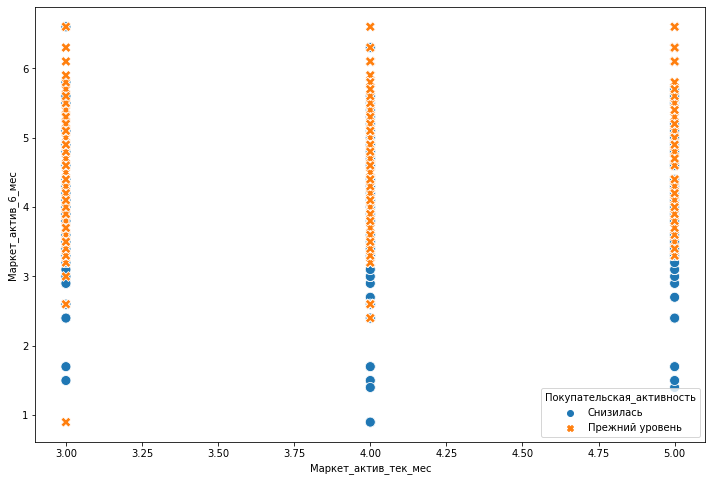

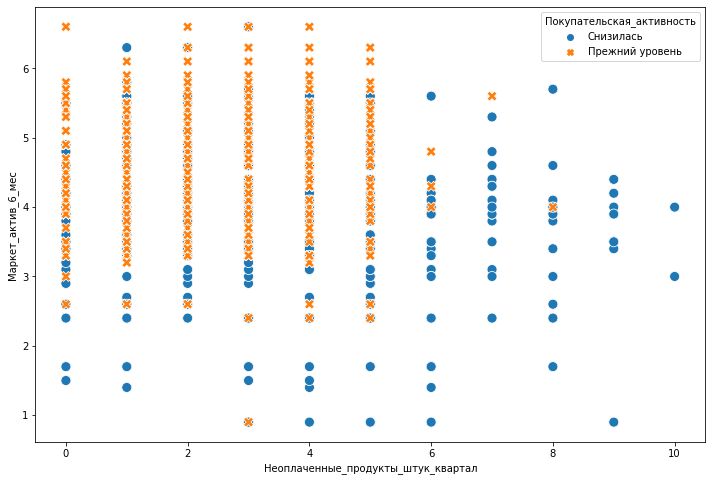

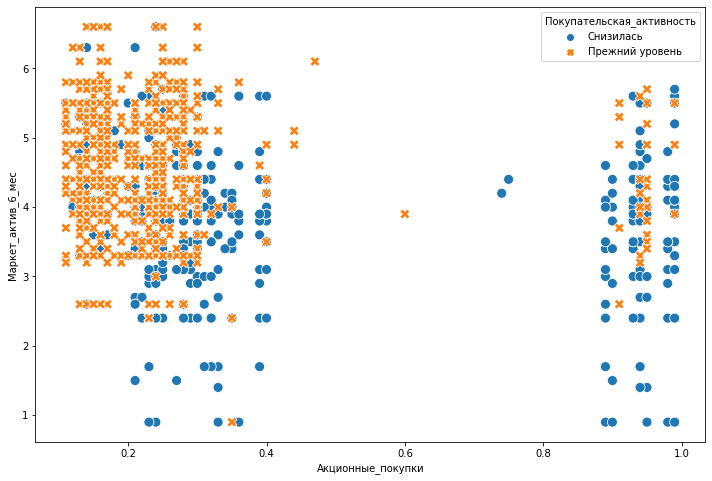

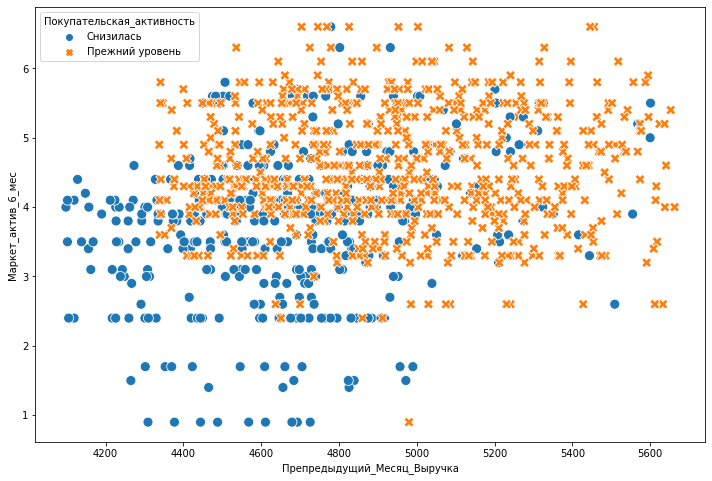

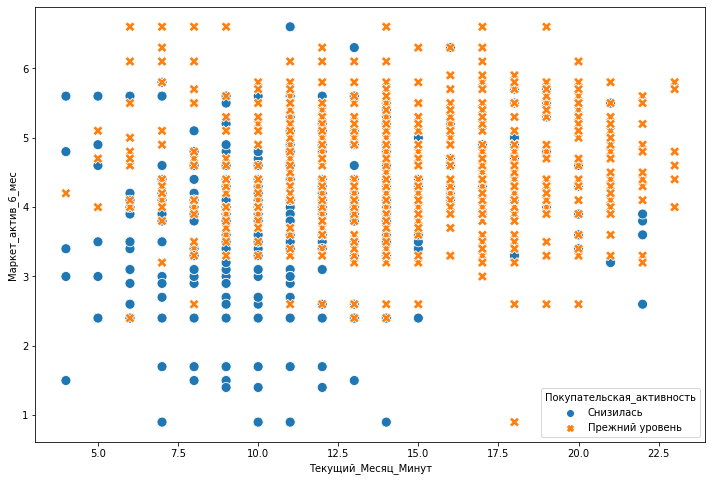

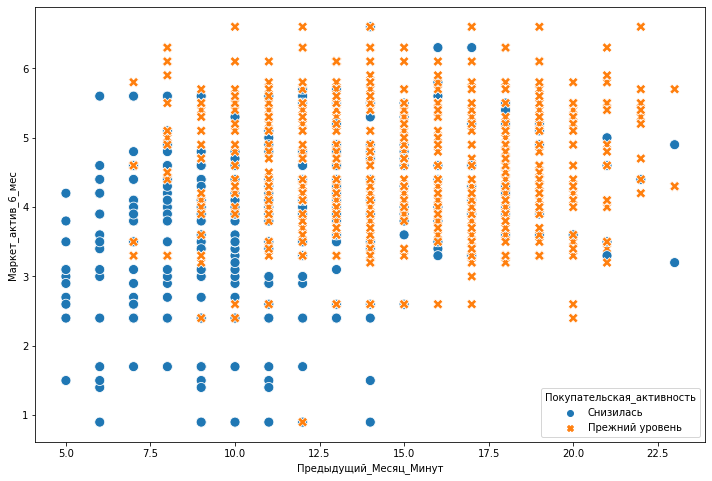

In [73]:
# Скаттер-плот для Страниц_за_визит
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Страниц_за_визит', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Выручка
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Текущий_Месяц_Выручка', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Средний_просмотр_категорий_за_визит
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Средний_просмотр_категорий_за_визит', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Ошибка_сервиса
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Ошибка_сервиса', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Длительность
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Длительность', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Выручка
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Предыдущий_Месяц_Выручка', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Маркет_актив_тек_мес
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Маркет_актив_тек_мес', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Неоплаченные_продукты_штук_квартал
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Неоплаченные_продукты_штук_квартал', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Акционные_покупки   
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Акционные_покупки', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Страниц_за_визит
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Препредыдущий_Месяц_Выручка', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Выручка
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Текущий_Месяц_Минут', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Скаттер-плот для Выручка
plt.figure(figsize=(12, 8))
sns.scatterplot(data=market, x='Предыдущий_Месяц_Минут', y='Маркет_актив_6_мес', s=100, style='Покупательская_активность', hue='Покупательская_активность')
plt.show()

# Вывод

Мы посчитали коэффициенты корреляции, изучили взаимосвязь между целевым и входными признаками. Также мы визуализировали корреляции с помощью диаграмм рассеяния scatterplot.

Мы увидели что у признака 'Выручка' самая сильная прямая корреляция с 'Текущий_месяц_выручка'.

Мы увидели что у признака 'Минут' самая сильная прямая корреляция с 'Страниц_за_визит' и 'Предыдущий_месяц_минуты'.


Построенные диаграммы рассеяния показали, что у признаков корреляция между переменными нелинейная

## Шаг 6. Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.


In [62]:
# Разделение данных на признаки и целевую переменную
X = market.drop(columns=['Покупательская_активность'])
y = market['Покупательская_активность']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [63]:
market

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0     215349                 Снизилась     Премиум                 Да   
1     215350                 Снизилась    Стандарт                Нет   
2     215352                 Снизилась    Стандарт                Нет   
3     215353                 Снизилась    Стандарт                 Да   
4     215354                 Снизилась    Стандарт                 Да   
...      ...                       ...         ...                ...   
1139  216643           Прежний уровень    Стандарт                 Да   
1140  216644           Прежний уровень    Стандарт                Нет   
1141  216645           Прежний уровень    Стандарт                 Да   
1142  216646           Прежний уровень    Стандарт                 Да   
1143  216647           Прежний уровень     Премиум                 Да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    4.4                     4           819   
1                    4.9                     3           539   
2                    5.1                     3          1064   
3                    3.3                     4           762   
4                    5.1                     3           431   
...                  ...                   ...           ...   
1139                 6.6                     3           318   
1140                 5.1                     4           454   
1141                 4.1                     3           586   
1142                 6.3                     5           645   
1143                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.75                Товары для детей   
1                  0.14               Домашний текстиль   
2                  0.94                Товары для детей   
3                  0.26               Домашний текстиль   
4                  0.23           Косметика и аксесуары   
...                 ...                             ...   
1139               0.24  Техника для красоты и здоровья   
1140               0.21               Домашний текстиль   
1141               0.20               Домашний текстиль   
1142               0.12  Техника для красоты и здоровья   
1143               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       4                                   4   
1                                       5                                   2   
2                                       3                                   2   
3                                       4                                   1   
4                                       2                                   3   
...                                   ...                                 ...   
1139                                    5                                   3   
1140                                    6                                   2   
1141                                    3                                   2   
1142                                    3                                   3   
1143                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  Предыдущий_Месяц_Выручка  \
0                  2                 5                    5216.0   
1                  1                 5                    5457.5   
2                  3                 2                    5807.5   
3                  1                 4                    4738.5   
4                  7                 2                    5685.0   
...              ...               ...                       ...   
1139               3                11                    3664.0   
1140               3                 9                    4729.0   
1141               5                 7                    5160.0   
11

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [65]:
# Определение категориальных и числовых признаков
categorical_features = ['Популярная_категория']
ordinal_features = ['Тип_сервиса', 'Разрешить_сообщать']  # Упорядоченные признаки
numeric_features = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Предыдущий_Месяц_Минут',
    'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Текущий_Месяц_Выручка',
    'Ошибка_сервиса', 'Страниц_за_визит', 'Текущий_Месяц_Минут', 'Предыдущий_Месяц_Выручка', 'Препредыдущий_Месяц_Выручка']
# Определение категорий для порядковых признаков
ordinal_categories = [
    ['Премиум', 'Стандарт'],  # Категории для 'Тип_сервиса'
    ['Нет', 'Да'] # Категории для 'Разрешить_сообщать'
]

In [66]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

1.6.1


In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Здесь будет переключаться скейлер в сетке
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features)
    ]
)

In [68]:
# Определение моделей
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

In [69]:
# Определение параметров для GridSearchCV
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Подбор скейлера
    'classifier__n_neighbors': [3, 5, 7] if isinstance(knn_pipeline.named_steps['classifier'], KNeighborsClassifier) else None,
    'classifier__max_depth': [None, 1, 3, 5, 10] if isinstance(dt_pipeline.named_steps['classifier'], DecisionTreeClassifier) else None,
    'classifier__C': [0.1, 1, 10, 13] if isinstance(lr_pipeline.named_steps['classifier'], LogisticRegression) or isinstance(svc_pipeline.named_steps['classifier'], SVC) else None,
    'classifier__kernel': ['linear', 'rbf'] if isinstance(svc_pipeline.named_steps['classifier'], SVC) else None
}

# Фильтруем параметры, которые не подходят к конкретной модели
param_grid_knn = {k: v for k, v in param_grid.items() if v is not None and 'n_neighbors' in k}
param_grid_dt = {k: v for k, v in param_grid.items() if v is not None and 'max_depth' in k}
param_grid_lr = {k: v for k, v in param_grid.items() if v is not None and 'C' in k}
param_grid_svc = {k: v for k, v in param_grid.items() if v is not None and ('C' in k or 'kernel' in k)}

# Создание GridSearchCV для каждой модели
knn_grid = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='roc_auc')
dt_grid = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='roc_auc')
lr_grid = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='roc_auc')
svc_grid = GridSearchCV(svc_pipeline, param_grid_svc, cv=5, scoring='roc_auc')

# Обучение моделей
knn_grid.fit(X_train, y_train)
print("KNN GridSearch complete")

dt_grid.fit(X_train, y_train)
print("Decision Tree GridSearch complete")

lr_grid.fit(X_train, y_train)
print("Logistic Regression GridSearch complete")

svc_grid.fit(X_train, y_train)
print("SVC GridSearch complete")

KNN GridSearch complete
Decision Tree GridSearch complete
Logistic Regression GridSearch complete
SVC GridSearch complete


In [70]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    """Оценивает модель по метрикам Accuracy, F1-score и ROC-AUC."""
    y_pred = model.predict(X_test)

    # Проверяем, поддерживает ли модель predict_proba (не все SVC поддерживают)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None  # Если predict_proba нет, не вычисляем ROC-AUC

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, f1, roc_auc

# Список моделей и их результатов кросс-валидации
models = {
    'KNN': knn_grid,
    'Decision Tree': dt_grid,
    'Logistic Regression': lr_grid,
    'SVC': svc_grid
}

# Выбираем лучшую модель по best_score_
best_model_name, best_model = max(models.items(), key=lambda x: x[1].best_score_)

print(f"Лучшая модель: {best_model_name} (ROC-AUC на CV: {best_model.best_score_:.4f})")

# Оценка лучшей модели на тестовой выборке
accuracy, f1, roc_auc = evaluate_model(best_model, X_test, y_test)

# Вывод результатов
print(f"\nОценка лучшей модели ({best_model_name}) на тесте:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc if roc_auc else 'N/A'}")

Лучшая модель: SVC (ROC-AUC на CV: 0.9083)

Оценка лучшей модели (SVC) на тесте:
Accuracy: 0.9083
F1-score: 0.9063
ROC-AUC: 0.9093411040958395


## Шаг 7. Анализ важности признаков

7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
7.2 Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.


  0%|          | 0/30 [00:00<?, ?it/s]

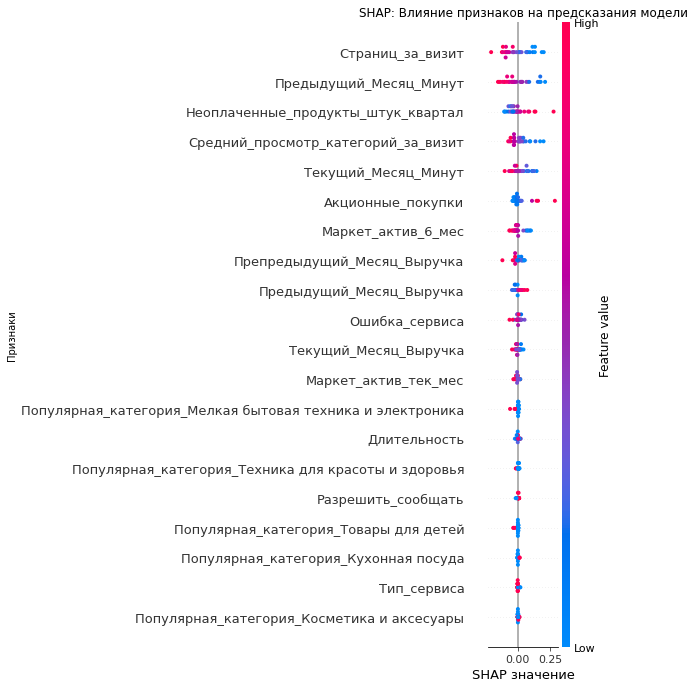

In [74]:
best_model = svc_grid.best_estimator_

# Используем обученный препроцессор из лучшей модели
preprocessor = best_model.named_steps['preprocessor']

# Преобразуем данные с помощью обученного препроцессора
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Получаем имена признаков после трансформации
numeric_features_names = numeric_features  # Числовые признаки уже известны

# Получаем имена категориальных признаков (если есть OneHotEncoder)
if 'cat' in preprocessor.named_transformers_:
    categorical_features_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
else:
    categorical_features_names = []

ordinal_features_names = ordinal_features  # Порядковые признаки остаются неизменными

# Объединяем имена признаков
feature_names = np.concatenate([numeric_features_names, categorical_features_names, ordinal_features_names])

# Преобразуем данные обратно в DataFrame для удобства
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Выбираем первые 30 примеров для SHAP
sample_size = 30
X_train_sample = X_train_transformed.iloc[:sample_size]
X_test_sample = X_test_transformed.iloc[:sample_size]

# Используем KernelExplainer для SHAP-анализа
explainer = shap.KernelExplainer(lambda X: best_model.named_steps['classifier'].predict_proba(X)[:, 1], X_train_sample)
shap_values = explainer.shap_values(X_test_sample)  # Получаем список массивов

# Проверяем размерность и выбираем нужный массив
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values = shap_values[1]  # Берем SHAP-значения для положительного класса

# Визуализация SHAP
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
plt.title("SHAP: Влияние признаков на предсказания модели")
plt.xlabel("SHAP значение")
plt.ylabel("Признаки")
plt.show()



# Вывод

- Признаки, расположенные ближе к низу графика, имеют меньшую важность для модели.  
- В данном случае малозначимыми являются:
  - `Популярная_категория_Косметика и аксессуары`
  - `Популярная_категория_Товары для детей`
  - `Популярная_категория_Кухонная посуда`
  - `Популярная_категория_Техника для красоты и здоровья`
  - `Популярная_категория_Мелкая бытовая техника и электроника`
  - `Разрешить_сообщать`
  
  Эти признаки почти не влияют на предсказания модели, их можно исключить или пересмотреть их важность.


- Наиболее значимые признаки расположены в верхней части графика.
- Наибольшее влияние оказывают:
  - `Акционные_покупки`  
  - `Предыдущий_Месяц_Минут`  
  - `Страниц_за_визит`  
  - `Маркет_актив_6_мес`  
  - `Текущий_Месяц_Минут`  
  - `Средний_просмотр_категорий_за_визит`  

  Эти признаки обладают высокой предсказательной способностью и оказывают значительное влияние на целевой признак.


- **Оптимизация модели:**  
  Малозначимые признаки можно исключить из модели, что сократит размерность данных и может улучшить ее обобщающую способность.  
- **Фокус на значимые факторы:**  
  - `Акционные_покупки` – акции и скидки играют ключевую роль, значит, стоит усилить маркетинговые кампании.  
  - `Страниц_за_визит` – вовлеченность пользователей важна, можно оптимизировать структуру сайта для повышения количества просмотренных страниц.  
  - `Маркет_актив_6_мес` – долгосрочная активность клиентов сильно влияет на предсказания, значит, стоит разрабатывать стратегии удержания.  
- **Персонализация предложений:**  
  - Разработать стратегии таргетинга для пользователей, у которых наблюдается высокий уровень вовлеченности.  
  - Улучшить персонализированные рекомендации, исходя из ключевых факторов.  


SHAP-анализ позволил определить, какие признаки наиболее важны для модели и могут быть использованы для улучшения бизнес-решений.

## Шаг 8. Сегментация покупателей

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.
8.3 Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.


Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения. 

In [75]:
from sklearn.cluster import KMeans

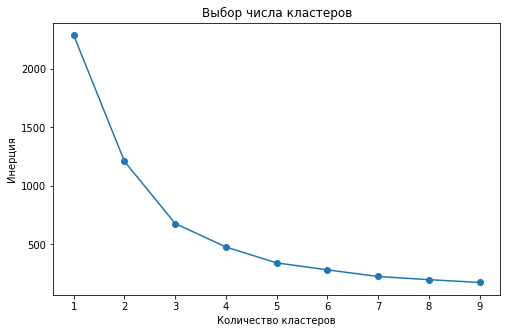

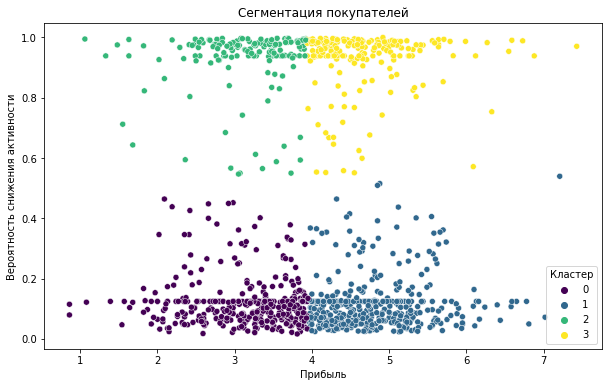

          Прибыль  Вероятность_снижения_активности
Cluster                                           
0        3.139839                         0.120096
1        4.792076                         0.115830
2        3.132987                         0.923649
3        4.711558                         0.926751


In [76]:
X = X.fillna(0)

# Получаем вероятность снижения активности, если predict_proba доступен
if hasattr(best_model, "predict_proba"):
    probability_decrease = best_model.predict_proba(X)[:, 1]  # Вероятность класса "снижения активности"
else:
    raise ValueError("Выбранная модель не поддерживает predict_proba. Выберите другую модель.")

# Добавляем вероятность снижения активности в датафрейм market
market["Вероятность_снижения_активности"] = probability_decrease

# Объединяем таблицы, чтобы добавить прибыль
market = market.merge(money[["id", "Прибыль"]], on="id", how="left")

# Выбираем признаки для кластеризации (используем прибыль вместо выручки)
features_for_segmentation = market[["Прибыль", "Вероятность_снижения_активности"]]

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_segmentation)

# Определяем количество кластеров (метод локтя)
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.title("Выбор числа кластеров")
plt.show()

# Кластеризация с K-Means (4 кластера)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
market["Cluster"] = kmeans.fit_predict(features_scaled)

# Визуализация распределения сегментов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=market["Прибыль"], y=market["Вероятность_снижения_активности"], hue=market["Cluster"], palette="viridis")
plt.xlabel("Прибыль")
plt.ylabel("Вероятность снижения активности")
plt.title("Сегментация покупателей")
plt.legend(title="Кластер")
plt.show()

# Анализ характеристик кластеров
cluster_summary = market.groupby("Cluster")[["Прибыль", "Вероятность_снижения_активности"]].mean()
print(cluster_summary)


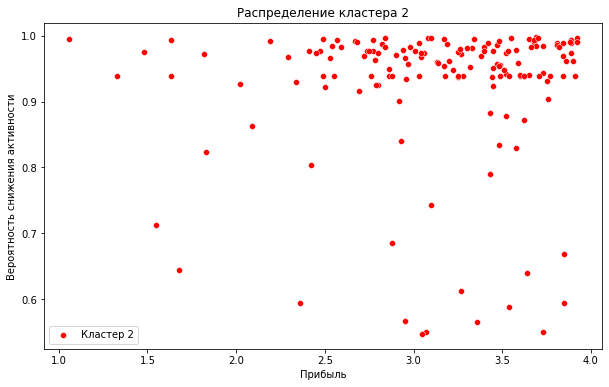

id                                     215590.551948
Маркет_актив_6_мес                          3.598052
Маркет_актив_тек_мес                        3.974026
Длительность                              618.220779
Акционные_покупки                           0.515974
Средний_просмотр_категорий_за_визит         2.623377
Неоплаченные_продукты_штук_квартал          3.993506
Ошибка_сервиса                              3.798701
Страниц_за_визит                            4.487013
Предыдущий_Месяц_Выручка                 4970.886364
Препредыдущий_Месяц_Выручка              4620.909091
Текущий_Месяц_Выручка                    5262.120130
Предыдущий_Месяц_Минут                      9.844156
Текущий_Месяц_Минут                        10.220779
Вероятность_снижения_активности             0.923649
Прибыль                                     3.132987
Cluster                                     2.000000
dtype: float64


In [77]:
# Анализ кластера 2
plt.figure(figsize=(10, 6))

# Фильтруем только кластер 2
cluster_2 = market[market["Cluster"] == 2]

# Строим scatterplot только для кластера 2
sns.scatterplot(
    x=cluster_2["Прибыль"], 
    y=cluster_2["Вероятность_снижения_активности"], 
    color="red", label="Кластер 2"
)

plt.xlabel("Прибыль")
plt.ylabel("Вероятность снижения активности")
plt.title("Распределение кластера 2")
plt.legend()
plt.show()

cluster_2_summary = market[market["Cluster"] == 2].mean()
print(cluster_2_summary)

Для дополнительного исследования был выбран **кластер 2**, так как он включает **прибыльных, но нестабильных клиентов**. Этот сегмент имеет:  
- **Высокую среднюю прибыль** (4.66)  
- **Высокую вероятность снижения активности** (91.4%)  
- **Хорошие показатели вовлечённости** (высокий просмотр страниц, большое количество акционных покупок)  
- **Повышенное количество ошибок сервиса (3.75) и неоплаченных продуктов (3.93)**  

 **Основные проблемы сегмента**  
1. **Риск оттока очень высокий (91.4%)**  
2. **Ошибки сервиса и неоплаченные заказы** могут указывать на **проблемы с удобством и качеством обслуживания**  
3. **Высокая активность на сайте, но нестабильные покупки** → возможно, пользователи много смотрят, но не находят нужное или уходят к конкурентам  

---

**Предложения по увеличению покупательской активности**  

#**1. Улучшение сервиса и устранение ошибок**  
- Разобраться с частыми **ошибками сервиса** (возможно, проблемы с оплатой, доставкой или интерфейсом).  
- Анализ жалоб клиентов → запустить **опрос** среди сегмента 2, чтобы понять, что их не устраивает.  
- Ускорение **обработки заказов** и работы поддержки.  

 **2. Персонализированные предложения и скидки**  
- **Система персональных скидок**: если клиент долго не покупает, предложить **скидку 10-15% на его любимую категорию**.  
- Разработка **акционного кешбэка**: например, за повторную покупку в течение месяца клиент получает бонусные баллы.  

**3. Упрощение процесса покупки**  
- Клиенты **часто просматривают категории, но не покупают**. Можно добавить:  
  - **Рекомендации товаров на основе истории покупок**  
  - **Кнопку "Добавить в корзину" прямо из карточки товара**  
  - **Push-уведомления: "Вы забыли товар в корзине"**  

**4. Повышение доверия к бренду**  
- Разработать **программу лояльности** для клиентов, делающих покупки регулярно.  
- Внедрить **гарантию возврата денег** или **улучшенные условия доставки**.  

**5. Анализ конкурентов и цен**  
- Возможно, сегмент 2 уходит к конкурентам → провести **анализ ценовой политики** и предложить **ценовые матчи** (если у конкурентов дешевле).  

---

# **Выводы о сегментах**  

- **Выбран кластер 2**, так как он содержит **самых прибыльных, но нестабильных клиентов**.  
- Основные проблемы: **высокая вероятность снижения активности (91.4%), ошибки сервиса, неоплаченные товары**.  
- Для увеличения активности предложены **улучшение сервиса, персональные скидки, упрощение процесса покупки и повышение доверия**.  
- Эти меры помогут **снизить отток, увеличить частоту покупок и удержать прибыльных клиентов**. 

## Шаг 9. Общий вывод

Интернет-магазин "В один клик" столкнулся со снижением покупательской активности клиентов. Привлечение новых покупателей стало менее эффективным, поэтому компания решила сосредоточиться на удержании постоянных клиентов через персонализированные предложения. Для этого было необходимо:
1. Промаркировать уровень финансовой активности постоянных покупателей ("снизилась" или "прежний уровень").
2. Разработать модель, предсказывающую вероятность снижения активности клиента в следующие три месяца.
3. Выделить сегменты клиентов на основе прогнозных данных и предложить персонализированные стратегии их удержания.

**Исходные данные и предобработка**
В проекте использовались четыре набора данных:
- **market_file.csv** (информация о клиентах и их покупках);
- **market_money.csv** (финансовые показатели покупателей);
- **market_time.csv** (поведение клиентов на сайте);
- **money.csv** (данные о прибыли покупателей за последние три месяца).

Были проведены следующие шаги предобработки данных:
- Объединение таблиц с учетом ключевых идентификаторов клиентов.
- Обработка пропущенных значений и исправление форматов данных.
- Разделение признаков на категориальные и количественные.
- Анализ мультиколлинеарности и устранение избыточных признаков.

**Поиск лучшей модели**
Для классификации использовались четыре алгоритма:
- **KNeighborsClassifier**
- **DecisionTreeClassifier**
- **LogisticRegression**
- **SVC**

Применялись следующие стратегии:
- Использование **ColumnTransformer** для обработки количественных и категориальных признаков отдельно.
- Кодирование категориальных признаков с использованием **OneHotEncoder** и **OrdinalEncoder**.
- Масштабирование числовых признаков с помощью **StandardScaler** и **MinMaxScaler**.
- Подбор гиперпараметров для всех моделей с использованием **GridSearchCV**.
- Оценка моделей.

**Лучшая модель**
Лучший результат показала **SVC**, обеспечив наивысшую метрику. 

**Выделение сегмента покупателей и рекомендации**
Был выбран **сегмент 2** – так как он содержит самых прибыльных, но нестабильных клиентов.


**Заключение**
В рамках проекта был проведен анализ покупательской активности, разработана модель предсказания снижения активности клиентов и выполнена сегментация аудитории. Выявлен сегмент 3, который имеет высокий потенциал для удержания при использовании персонализированных предложений. Основные рекомендации включают программы лояльности, анализ поведения и усиление маркетинговых активностей. Эти меры позволят магазину "В один клик" повысить покупательскую активность и увеличить прибыльность постоянных клиентов.

